In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
from tensorflow.keras.models import load_model

In [5]:
!pip install imutils

  Preparing metadata (setup.py) ... done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25834 sha256=5dd61f256881f9ec9df6b1ae9fc336aabbf0946af44b61446e39669d6c95da3e
  Stored in directory: /root/.cache/pip/wheels/85/cf/3a/e265e975a1e7c7e54eb3692d6aa4e2e7d6a3945d29da46f2d7
Successfully built imutils


In [6]:
!pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56439 sha256=bf03bcb65a6257bdbb45844ae9061918865bed6dac1bec185386a96fed8072f8
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [6]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import random 
import cv2
import imutils
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [9]:
dir = "/kaggle/input/handwritten-characters/Train"
train_data = []
img_size = 32
non_chars = ["#","$","&","@"]
for i in os.listdir(dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 4000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        train_data.append([img,i])

In [10]:
len(train_data)

140000

In [11]:
val_dir = "/kaggle/input/handwritten-characters/Validation"
val_data = []
img_size = 32
for i in os.listdir(val_dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(val_dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 1000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        val_data.append([img,i])

In [12]:
len(val_data)

15209

In [13]:
random.shuffle(train_data)
random.shuffle(val_data)

In [14]:
train_X = []
train_Y = []
for features,label in train_data:
    train_X.append(features)
    train_Y.append(label)

In [15]:
val_X = []
val_Y = []
for features,label in val_data:
    val_X.append(features)
    val_Y.append(label)

In [16]:
LB = LabelBinarizer()
train_Y = LB.fit_transform(train_Y)
val_Y = LB.fit_transform(val_Y)

In [17]:
train_X = np.array(train_X)/255.0
train_X = train_X.reshape(-1,32,32,1)
train_Y = np.array(train_Y)

In [18]:
val_X = np.array(val_X)/255.0
val_X = val_X.reshape(-1,32,32,1)
val_Y = np.array(val_Y)

In [19]:
print(train_X.shape,val_X.shape)

(140000, 32, 32, 1) (15209, 32, 32, 1)


In [20]:
print(train_Y.shape,val_Y.shape)

(140000, 35) (15209, 35)


In [21]:
np.save("train_X.npy",train_X)
np.save("train_Y.npy",train_Y)

np.save("val_X.npy",val_X)
np.save("val_Y.npy",val_Y)

In [22]:
train_X = np.load("train_X.npy")
train_Y = np.load("train_Y.npy")

val_X = np.load("val_X.npy")
val_Y = np.load("val_Y.npy")

In [23]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(35, activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 5, 5, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 35)             │         4,515 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 162,851 (636.14 KB)

 Trainable params: 162,851 (636.14 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

In [26]:
history = model.fit(train_X,train_Y, epochs=100, batch_size=32, validation_data = (val_X, val_Y),  verbose=1)

Epoch 1/100


2024-05-05 16:07:54.520600: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 1.20467, expected 0.66345
2024-05-05 16:07:54.520657: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 1.91892, expected 1.3777
2024-05-05 16:07:54.520677: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 1.83304, expected 1.29182
2024-05-05 16:07:54.520691: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 2.20811, expected 1.6669
2024-05-05 16:07:54.520705: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 2.05583, expected 1.51462
2024-05-05 16:07:54.520718: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 2.15556, expected 1.61435
2024-05-05 16:07:54.520728: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 2.35283, expected 1.81162
2024-05-05 16:07:54.520742: E external/local_xla/xla/serv

  61/4375 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.0502 - loss: 3.5158     

I0000 00:00:1714925277.553303     138 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4361/4375 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6874 - loss: 1.0341

2024-05-05 16:08:09.899312: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 31: 0.397571, expected 0.247759
2024-05-05 16:08:09.899387: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2048: 1.75504, expected 1.05842
2024-05-05 16:08:09.899403: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2049: 3.11559, expected 2.41897
2024-05-05 16:08:09.899414: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2050: 3.14031, expected 2.4437
2024-05-05 16:08:09.899424: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2051: 3.49862, expected 2.802
2024-05-05 16:08:09.899434: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2052: 3.54802, expected 2.8514
2024-05-05 16:08:09.899445: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2053: 3.67345, expected 2.97684
2024-05-05 16:08:09.899456: E external

4375/4375 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.6878 - loss: 1.0327 - val_accuracy: 0.8972 - val_loss: 0.3142
Epoch 2/100
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8794 - loss: 0.3568 - val_accuracy: 0.9128 - val_loss: 0.2790
Epoch 3/100
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8934 - loss: 0.3106 - val_accuracy: 0.9099 - val_loss: 0.2797
Epoch 4/100
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9014 - loss: 0.2836 - val_accuracy: 0.9101 - val_loss: 0.2747
Epoch 5/100
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9073 - loss: 0.2656 - val_accuracy: 0.9206 - val_loss: 0.2510
Epoch 6/100
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9129 - loss: 0.2471 - val_accuracy: 0.8969 - val_loss: 0.2852
Epoch 7/100
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9162 - loss: 0.2421 - val_accuracy: 0.9095 - val_loss: 0.2690
Epoch 8/100
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9189 - loss: 0.229

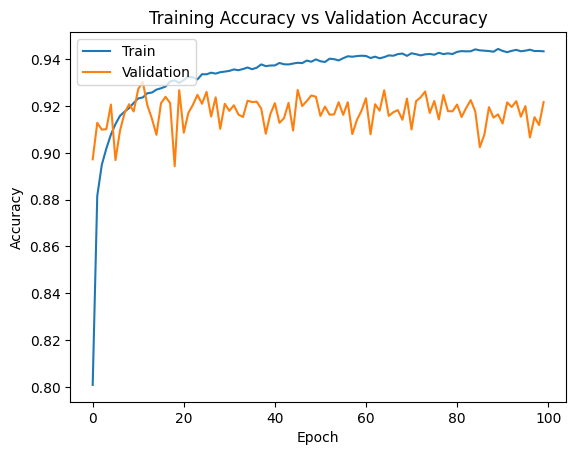

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

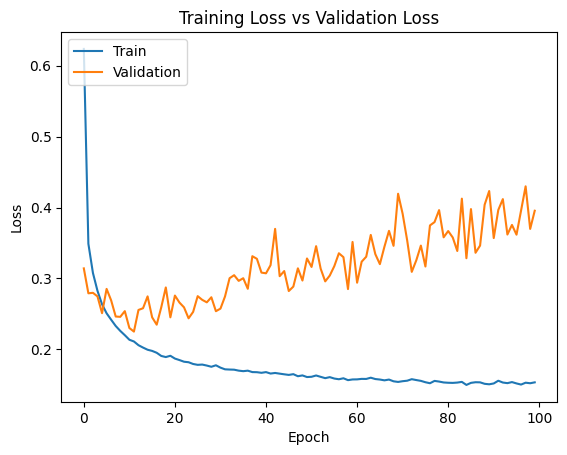

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [29]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [30]:
def get_letters(img):
    letters = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    # loop over the contours
    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)
        thresh = thresh.astype("float32") / 255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(1,32,32,1)
        ypred = model.predict(thresh)
        ypred = LB.inverse_transform(ypred)
        [x] = ypred
        letters.append(x)
    return letters, image

#plt.imshow(image)

In [31]:
def get_word(letter):
    word = "".join(letter)
    return word

In [33]:
test_data_dir = '/kaggle/input/test-v2'

In [35]:
# Load the entire model
from tensorflow.keras.models import load_model
# Save the model weights
model.save_weights('/kaggle/working/model_weights.weights.h5')

In [ ]:
model.save('my_model.h5')

In [ ]:
import tensorflow

tensorflow.keras.models.save_model(model, "model.h5")

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model = model)
tflite_model = converter.convert()
open('converted_model.tflite', 'wb').write(tflite_model)